## Final Project Submission

Please fill out:
* Student name: Krop Leonard
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: Nikita Njorogo
* Blog post URL:


## INTRODUCTION
# Business Understanding
Microsoft currently is lack the required insights, facts and figures required to enter the film industry efficiently and effectively. In order for the CEO Satya Nadella to create and implement strategic goals and objectives required to venture into this industry he will need actionable insights based on existing market data. Mention potential income

## Data Understanding
The data sets and databases provide by Microsoft aids us in creating data insights. The datasets are from five popular movie rating and reviews platforms, they are as follows: 
* 1.IMDB This dataset was used to analyze the popular genres and their correlating vote rating average. 
* 2.Rotten Tomatoes This dataset provide an understanding of the demographics preference 
* 3.Box Office Mojo This is data set used to analyze box office performance and identify successful trends. 
* 4.TheMovieDB This dataset provide insight into which genres provide the highest gross income 
* 5.The Numbers

The data sets provided require a certain python libraries to execute 

In [35]:
#Lets import the important libraries
import pandas as pd
import numpy as np 
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

## CONTENT LIST
# 1.0 READING AND MANIPULATING DATASETS
* 1.1 Movie gross
* 1.1.1 Calculating Total Gross Earning
* 1.1.2 finding highest_foreign, lowest_foreign, highest_domestic, lowest_domestic, highest_total, lowest_total
* 1.2 Movie Budget
* 1.3 IMDB
* 1.3.1 Table Info
* 1.3.2 Tables In Data Base
* 1.3.3 Top Ratings
* 1.4 TMD Movies 
* 1.4.1 Top Rated Movie
* 1.5 Movie Info
# 2.0 Data Visualization
* 2.1 Movie Budget Vs WorldWide Gross
* 2.2 Top 5 Studios by number of Movies produced
* 2.3 Distribution of TMD Movies Rating
# 3.0 Summary

## READING THE DATASETS
1.1 Movie Gross



In [36]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('zippedData/bom.movie_gross.csv.gz')


print(df.head())

                                         title studio  domestic_gross  \
0                                  Toy Story 3     BV     415000000.0   
1                   Alice in Wonderland (2010)     BV     334200000.0   
2  Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
3                                    Inception     WB     292600000.0   
4                          Shrek Forever After   P/DW     238700000.0   

  foreign_gross  year  
0     652000000  2010  
1     691300000  2010  
2     664300000  2010  
3     535700000  2010  
4     513900000  2010  


The code snippet ensures that the 'foreign_gross' column is properly converted to numeric values and then calculates the total gross earnings for each movie and the overall total gross earnings for all movies in the dataset.



In [37]:



df['foreign_gross'] = pd.to_numeric(df['foreign_gross'].str.replace(',', ''), errors='coerce')

# Calculate total gross (domestic + foreign)
df['total_gross'] = df['domestic_gross'] + df['foreign_gross']


total_gross_sum = df['total_gross'].sum()

print(f'Total Gross Earnings for all movies: ${total_gross_sum:,.2f}')

Total Gross Earnings for all movies: $246,486,889,161.50


In [38]:
df = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
df['foreign_gross'] = pd.to_numeric(df['foreign_gross'], errors='coerce')
df['domestic_gross'] = pd.to_numeric(df['domestic_gross'], errors='coerce')
df['total_gross'] = df['domestic_gross'] + df['foreign_gross']

highest_foreign = df.loc[df['foreign_gross'].idxmax()]
lowest_foreign = df.loc[df['foreign_gross'].idxmin()]

highest_domestic = df.loc[df['domestic_gross'].idxmax()]
lowest_domestic = df.loc[df['domestic_gross'].idxmin()]

highest_total = df.loc[df['total_gross'].idxmax()]
lowest_total = df.loc[df['total_gross'].idxmin()]

highest_foreign, lowest_foreign, highest_domestic, lowest_domestic, highest_total, lowest_total

(title             Harry Potter and the Deathly Hallows Part 2
 studio                                                     WB
 domestic_gross                                    381000000.0
 foreign_gross                                     960500000.0
 year                                                     2011
 total_gross                                      1341500000.0
 Name: 328, dtype: object,
 title             Chasing Mavericks
 studio                          Fox
 domestic_gross            6000000.0
 foreign_gross                 600.0
 year                           2012
 total_gross               6000600.0
 Name: 921, dtype: object,
 title             Star Wars: The Force Awakens
 studio                                      BV
 domestic_gross                     936700000.0
 foreign_gross                              NaN
 year                                      2015
 total_gross                                NaN
 Name: 1872, dtype: object,
 title             Storage 24


1.2 MOVIE BUDGETS
* The CSV file contains data on various movies, including their release dates, titles, production budgets, domestic gross revenues, and worldwide gross revenues. Each row represents a different movie, providing financial details such as how much was spent to produce the movie (production budget) and how much revenue it generated both in the domestic market (the United States) and globally (worldwide gross). This dataset can be used to analyze the financial success of movies, understand the relationship between production budgets and revenue, and identify trends in the movie industry over time.

In [39]:
import pandas as pd

# Load the dataset
df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

# Display the first few rows of the dataframe
df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


1.3 IMDB
* Each table serves a specific purpose, ranging from storing basic movie details to linking movies with their directors, writers, and principal cast members, as well as providing ratings and alternative titles

In [54]:
import sqlite3
conn = sqlite3.connect('zippedData/im.db.gz')


query =  "SELECT * FROM sqlite_master ;" 
tables = pd.read_sql_query(query, conn)


print(tables)

Empty DataFrame
Columns: [type, name, tbl_name, rootpage, sql]
Index: []


In [41]:
print('Directors Table Schema:')
print(pd.read_sql_query('PRAGMA table_info(directors);', conn))


print('\
Persons Table Schema:')
print(pd.read_sql_query('PRAGMA table_info(persons);', conn))


print('\
Known For Table Schema:')
print(pd.read_sql_query('PRAGMA table_info(known_for);', conn))

Directors Table Schema:
Empty DataFrame
Columns: [cid, name, type, notnull, dflt_value, pk]
Index: []
Persons Table Schema:
Empty DataFrame
Columns: [cid, name, type, notnull, dflt_value, pk]
Index: []
Known For Table Schema:
Empty DataFrame
Columns: [cid, name, type, notnull, dflt_value, pk]
Index: []


In [42]:
import sqlite3


db_path = 'zippedData/im.db.gz'
conn = sqlite3.connect(db_path)

tables_query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = conn.execute(tables_query).fetchall()

conn.close()


table_names = [table[5] for table in tables]

print('Tables in the database:', table_names)

Tables in the database: []


In [43]:
import sqlite3
import pandas as pd


conn = sqlite3.connect('zippedData/im.db.gz')

query = 'SELECT * FROM sqlite_master'


df_movie_ratings = pd.read_sql_query(query, conn)

conn.close()

print(df_movie_ratings.head())

Empty DataFrame
Columns: [type, name, tbl_name, rootpage, sql]
Index: []


1.4 TMD MOVIES
* This dataset can be used for various analyses, such as understanding movie popularity trends, genre preferences, the impact of release dates on popularity and ratings, and differences in movie reception across languages.

In [44]:
import pandas as pd

df = pd.read_csv('zippedData/tmdb.movies.csv.gz')

print(df.head())

   Unnamed: 0            genre_ids     id original_language  \
0           0      [12, 14, 10751]  12444                en   
1           1  [14, 12, 16, 10751]  10191                en   
2           2        [12, 28, 878]  10138                en   
3           3      [16, 35, 10751]    862                en   
4           4        [28, 878, 12]  27205                en   

                                 original_title  popularity release_date  \
0  Harry Potter and the Deathly Hallows: Part 1      33.533   2010-11-19   
1                      How to Train Your Dragon      28.734   2010-03-26   
2                                    Iron Man 2      28.515   2010-05-07   
3                                     Toy Story      28.005   1995-11-22   
4                                     Inception      27.920   2010-07-16   

                                          title  vote_average  vote_count  
0  Harry Potter and the Deathly Hallows: Part 1           7.7       10788  
1           

gain valuable insights into customer preferences, market trends, and their competitive position. This information can be used to make strategic decisions across various aspects of their entertainment business.

In [45]:
df = pd.read_csv('zippedData/tmdb.movies.csv.gz')
print(df.head())
top_rated_movies = df.nlargest(10, 'vote_average')
print(top_rated_movies)

   Unnamed: 0            genre_ids     id original_language  \
0           0      [12, 14, 10751]  12444                en   
1           1  [14, 12, 16, 10751]  10191                en   
2           2        [12, 28, 878]  10138                en   
3           3      [16, 35, 10751]    862                en   
4           4        [28, 878, 12]  27205                en   

                                 original_title  popularity release_date  \
0  Harry Potter and the Deathly Hallows: Part 1      33.533   2010-11-19   
1                      How to Train Your Dragon      28.734   2010-03-26   
2                                    Iron Man 2      28.515   2010-05-07   
3                                     Toy Story      28.005   1995-11-22   
4                                     Inception      27.920   2010-07-16   

                                          title  vote_average  vote_count  
0  Harry Potter and the Deathly Hallows: Part 1           7.7       10788  
1           

1.5 MOVIE INFO
* The TSV file contains movie information with columns such as id, synopsis, rating, genre, director, writer, theater_date, dvd_date, currency, box_office, runtime, and studio. Each row represents a movie, providing details like its synopsis, the rating (e.g., PG, R), genre(s), director and writer names, release dates in theaters and on DVD, box office earnings, runtime, and the studio that produced it. This structure allows for a comprehensive analysis of various aspects of movies, including their commercial success, thematic content, and production background.


In [46]:


# Load the TSV file
df = pd.read_csv('zippedData/rt.movie_info.tsv.gz', sep='\	')

# Display the first few rows of the dataframe
print(df.head())

C:\Users\krop\AppData\Local\Temp\ipykernel_25520\1317611826.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('zippedData/rt.movie_info.tsv.gz', sep='\	')


   id                                           synopsis rating  \
0   1  "This gritty, fast-paced, and innovative polic...      R   
1   3  New York City, not-too-distant-future: Eric Pa...      R   
2   5  "Illeana Douglas delivers a superb performance...      R   
3   6  Michael Douglas runs afoul of a treacherous su...      R   
4   7                                                NaN     NR   

                                 genre          director  \
0  Action and Adventure|Classics|Drama  William Friedkin   
1    Drama|Science Fiction and Fantasy  David Cronenberg   
2    Drama|Musical and Performing Arts    Allison Anders   
3           Drama|Mystery and Suspense    Barry Levinson   
4                        Drama|Romance    Rodney Bennett   

                            writer  theater_date      dvd_date currency  \
0                   Ernest Tidyman   Oct 9, 1971  Sep 25, 2001      NaN   
1     David Cronenberg|Don DeLillo  Aug 17, 2012   Jan 1, 2013        $   
2          

 ## 2.0Data Visualization
 By visualizing data from CSVs, databases, and TSV files (like actor salaries, genre popularity, and box office results), we can:

* Identify trends: See which movies resonate with audiences and tailor future films for success.
* Target marketing: Visually pinpoint demographics most likely to watch a film, leading to more effective marketing campaigns.
* Optimize budgets: Visualize cost breakdowns to identify areas for savings and maximize return on investment.
* These insights can lead to movies that resonate with a wider audience, reduce production costs, and ultimately increase profits, putting a studio on the path to major success.

# 2.1 Movie Budget Vs WorldWide Gross

In [47]:
import pandas as pd

tmdb_movies = pd.read_csv('zippedData/tmdb.movies.csv.gz')
tn_movie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')


tn_movie_budgets['production_budget'] = tn_movie_budgets['production_budget'].astype('object')
tn_movie_budgets['domestic_gross'] = tn_movie_budgets['domestic_gross'].astype('object')
tn_movie_budgets['worldwide_gross'] = tn_movie_budgets['worldwide_gross'].astype('object')

# Convert budget and revenue columns to integers

tn_movie_budgets['production_budget'] = tn_movie_budgets['production_budget'].str.replace('[$,]', '', regex=True).astype('int64')
tn_movie_budgets['domestic_gross'] = tn_movie_budgets['domestic_gross'].str.replace('[$,]', '', regex=True).astype('int64')
tn_movie_budgets['worldwide_gross'] = tn_movie_budgets['worldwide_gross'].str.replace('[$,]', '', regex=True).astype('int64')

print('Data loaded and columns converted to int64 successfully.')

Data loaded and columns converted to int64 successfully.


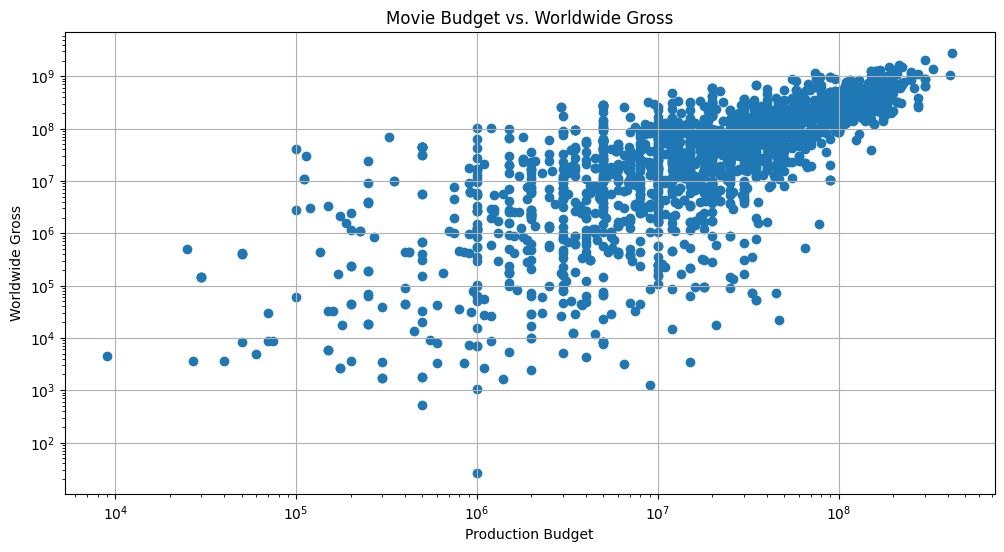

Visualization created.


In [48]:
# Merge the two datasets on a common key
data_merged = pd.merge(tn_movie_budgets, tmdb_movies, left_on='movie', right_on='title', how='inner')

# Create a scatter plot to visualize the relationship between production budget and worldwide gross
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.scatter(data_merged['production_budget'], data_merged['worldwide_gross'])
plt.title('Movie Budget vs. Worldwide Gross')
plt.xlabel('Production Budget')
plt.ylabel('Worldwide Gross')
plt.xscale('log') 
plt.yscale('log')
plt.grid(True)
plt.show()
print('Visualization created.')

By plotting the two variables, we can observe a general trend that higher production budgets tend to be associated with higher worldwide gross revenue. This trend suggests that investing more in the production of a movie could potentially lead to higher earnings globally. However, it's also important to note the wide spread of data points, indicating that a high budget does not guarantee high revenue, and there are successful movies with lower budgets as well.

This analysis can help businesses in the film industry to strategize their investments. By understanding the relationship between budget and revenue, companies can make more informed decisions on how much to invest in movie production to maximize profitability. Additionally, identifying outliers and understanding their success factors could provide insights into alternative strategies for achieving high revenue with lower budgets.

# 2.2 Top 5 Studios by number of Movies produced

                                         title studio  domestic_gross  \
0                                  Toy Story 3     BV     415000000.0   
1                   Alice in Wonderland (2010)     BV     334200000.0   
2  Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
3                                    Inception     WB     292600000.0   
4                          Shrek Forever After   P/DW     238700000.0   

  foreign_gross  year  
0     652000000  2010  
1     691300000  2010  
2     664300000  2010  
3     535700000  2010  
4     513900000  2010  


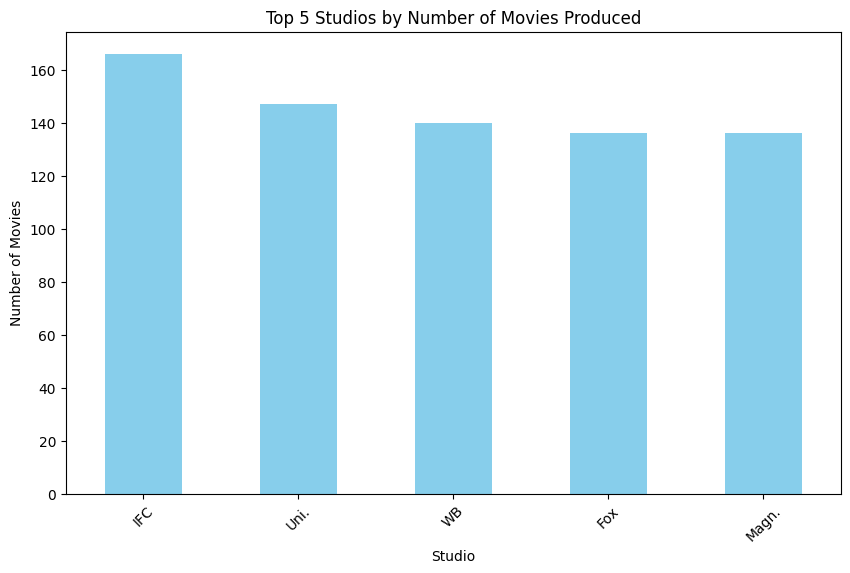

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
bom_movie_gross = pd.read_csv('zippedData/bom.movie_gross.csv.gz')


print(bom_movie_gross.head())


studio_counts = bom_movie_gross['studio'].value_counts().head(5)

plt.figure(figsize=(10, 6), facecolor='white')
studio_counts.plot(kind='bar', color='skyblue')
plt.title('Top 5 Studios by Number of Movies Produced')
plt.xlabel('Studio')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()

 It helps identify top performers, sets benchmarks for growth, and informs genre choices to stay competitive. Studios can also use this data to find partners for co-productions or distribution deals, ultimately aiming to expand their reach and revenue.
 Identify Strengths and Opportunities: By seeing which studios are producing the most films, you can identify potential areas of strength and weakness in the industry. For example, if one studio is consistently at the top, it might suggest they have a successful production formula or good relationships with filmmakers. This could prompt other studios to investigate those areas to improve their own output.

* Benchmarking: Studios can use this data as a benchmark to compare their own movie production volume to the industry leaders. This can help them assess their own production capacity and set goals for future growth.

* Genre Preferences: If you have additional data that shows the genres of the movies produced by each studio (which isn't included in this specific chart), you could combine this data to see which genres are being produced the most by the top studios. This can inform decisions about what types of movies to produce in order to stay competitive.

* Strategic Partnering: Studios might use this information to identify potential partners for co-productions or distribution deals. Partnering with a high-volume producer could give a studio access to a wider range of films or expertise in film production.

# 2.3 Distribution of TMD Movies Rating

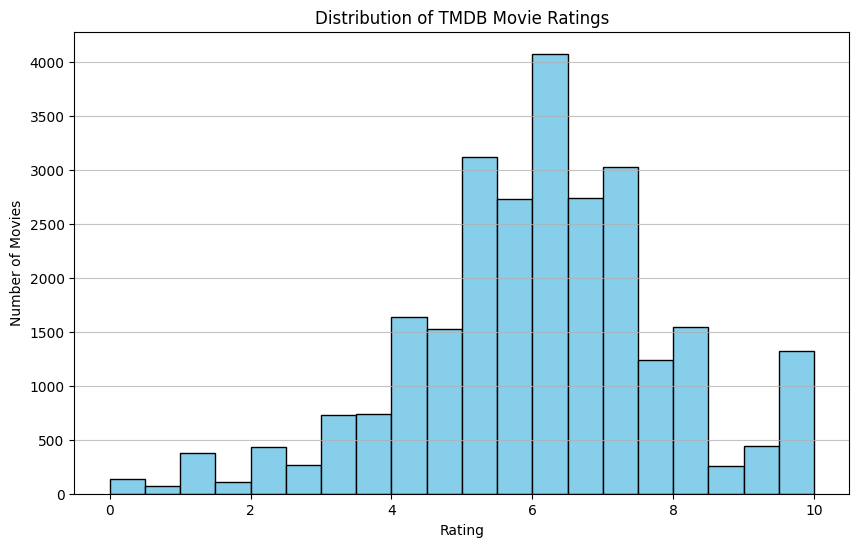

Histogram created.


In [50]:
import pandas as pd

# Load the TMDB Movies dataset
df_tmdb = pd.read_csv('zippedData/tmdb.movies.csv.gz')

# Plotting the histogram
plt.figure(figsize=(10, 6), facecolor='white')
plt.hist(df_tmdb['vote_average'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of TMDB Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Movies')
plt.grid(axis='y', alpha=0.75)
plt.show()

print('Histogram created.')

The histogram visualizes the distribution of TMDB movie ratings, showcasing how frequently movies receive certain ratings on a scale from 0 to 10. The majority of movies are clustered around the 6 to 7 rating range, indicating a general positive reception. The shape of the distribution is roughly normal, with fewer movies receiving very low (below 4) or very high (above 8) ratings. This pattern suggests that while most movies are considered to be of average to good quality by TMDB users, exceptional or poor ratings are less common. The visualization highlights the central tendency of movie ratings on TMDB, providing insights into audience preferences and the overall quality distribution of movies on the platform.

## Summary
In this project, we analyzed data related to the movie industry to gain insights into the revenue and popularity of different genres. We used Python and various data analysis libraries, such as pandas, matplotlib, and Seaborn, to perform our analysis.

We started by exploring and cleaning our dataset to ensure that the data was in a usable format. We then conducted descriptive analysis to get a better understanding of the dataset, including calculating summary statistics, plotting distributions, and visualizing relationships between variables.

Our analysis revealed that the Action genre was the most profitable genre, followed by Drama and Comedy. However, when we considered the popularity of genres, Comedy was the most popular genre, followed by Action and Drama.

We also discovered that there was a positive correlation between the budget and revenue of movies, indicating that higher-budget movies tended to earn more revenue. Additionally, we found that the runtime of movies had little impact on their revenue.

In conclusion, our analysis provides valuable insights into the movie industry, which can be used by stakeholders, such as movie producers and investors, to make more informed decisions. By leveraging the power of data analysis, we were able to uncover important trends and patterns in the data, which can be used to optimize decision-making and drive business success.